# Cytation 5

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from pylabrobot.plate_reading import ImageReader, Cytation5Backend, ImagingMode

In [3]:
# for imaging, we need an environment variable to point to the Spinnaker GenTL file
import os
os.environ["SPINNAKER_GENTL64_CTI"] = "/usr/local/lib/spinnaker-gentl/Spinnaker_GenTL.cti"

In [4]:
import logging
logger = logging.getLogger("pylabrobot.plate_reading.biotek")
logger.setLevel(logging.DEBUG)

In [5]:
pr = ImageReader(name="PR", size_x=0,size_y=0,size_z=0, backend=Cytation5Backend())
await pr.setup(use_cam=True)

In [6]:
await pr.backend.get_firmware_version()

'1320200  Version 2.07'

In [7]:
await pr.backend.get_current_temperature()

23.5

In [8]:
await pr.open()

In [9]:
await pr.close()

## Plate reading

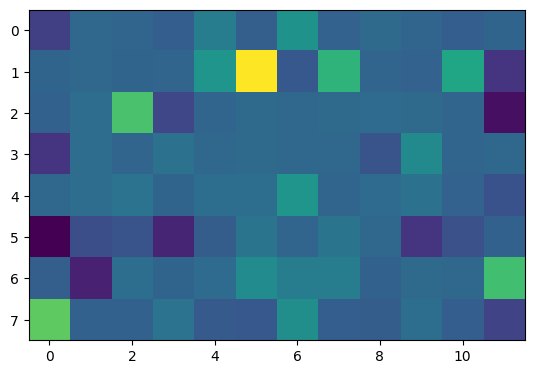

In [10]:
data = await pr.read_absorbance(wavelength=434)
plt.imshow(data)

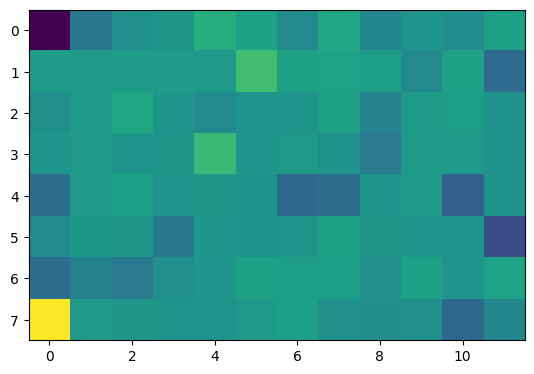

In [11]:
data = await pr.read_fluorescence(
  excitation_wavelength=485, emission_wavelength=528, focal_height=7.5
)
plt.imshow(data)

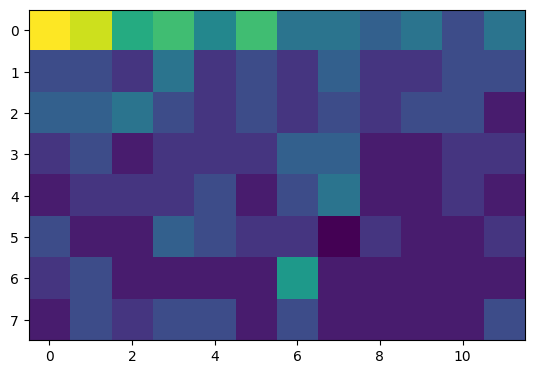

In [12]:
data = await pr.read_luminescence(focal_height=4.5)
plt.imshow(data)

## Shaking

In [13]:
await pr.backend.shake(shake_type=Cytation5Backend.ShakeType.LINEAR)

In [14]:
await pr.backend.stop_shaking()

## Imaging

### Installation

1. Install python 3.10
2. Download Spinnaker SDK and install (including Python) [https://www.teledynevisionsolutions.com/products/spinnaker-sdk/](https://www.teledynevisionsolutions.com/products/spinnaker-sdk/)
3. Install numpy==1.26 (this is an older version)

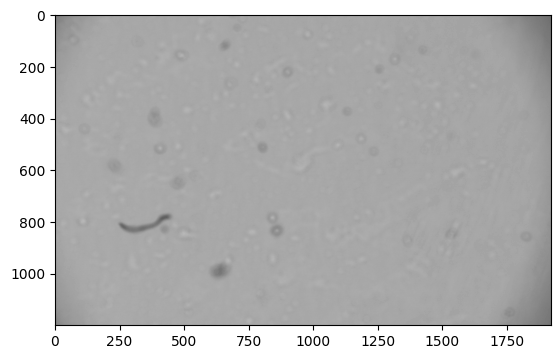

In [15]:
im = await pr.capture(well=(1, 1), mode=ImagingMode.BRIGHTFIELD, focal_height=3, exposure_time=5, gain=10)
plt.imshow(im, cmap="gray", vmin=0, vmax=255)

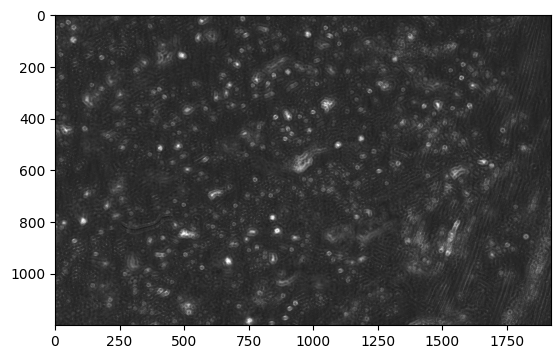

In [16]:
im = await pr.capture(well=(1, 1), mode=ImagingMode.PHASE_CONTRAST, focal_height=3, exposure_time=12, gain=24)
plt.imshow(im, cmap="gray", vmin=0, vmax=255)

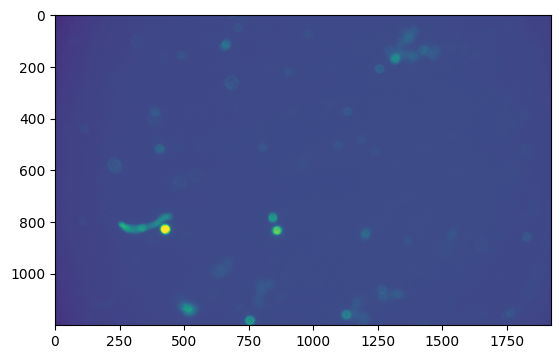

In [17]:
await pr.backend.set_gain(24)
im = await pr.capture(well=(1, 1), mode=ImagingMode.GFP, focal_height=3, exposure_time=1904)
plt.imshow(im, cmap="viridis", vmin=0, vmax=255)

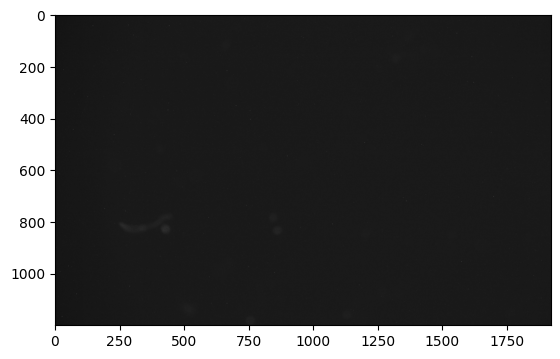

In [18]:
im = await pr.capture(well=(1, 1), mode=ImagingMode.TEXAS_RED, focal_height=3, exposure_time=1904)
plt.imshow(im, cmap="gray", vmin=0, vmax=255)

In [19]:
import time
import numpy as np

exposure_time = 1904

# first time setting imaging mode is slower
_ = await pr.capture(well=(1, 1), mode=ImagingMode.BRIGHTFIELD, focal_height=3.3, exposure_time=exposure_time)

l = []
for i in range(10):
  t0 = time.monotonic_ns()
  _ = await pr.capture(well=(1, 1), mode=ImagingMode.BRIGHTFIELD, focal_height=3.3, exposure_time=exposure_time)
  t1 = time.monotonic_ns()
  l.append((t1 - t0) / 1e6)

print(f"{np.mean(l):.2f} ms ± {np.std(l):.2f} ms")
print(f"Overhead: {(np.mean(l) - exposure_time):.2f} ms")

2089.59 ms ± 15.72 ms
Overhead: 185.59 ms
